Importamos los paquetes que necesitamos

In [30]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


Importamos los datos 

In [10]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Seleccionamos las columnas utiles

In [12]:
Columnas = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]
X = df[Columnas]
y = df["Survived"]

Ahora hacemos un preprocesamiento de los datos:
- rellenamos con la mediana los valores numericos faltantes
- llenamos valores categoricos como sexo y embarque con los mas frecuentes
- y convertimos estas categorias a numeros

In [13]:
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Pclass", "Sex", "Embarked"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

Ahora Creamos el Modelo

In [17]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("tree", DecisionTreeClassifier(max_depth=4, random_state=42))
])

Entrenamos nuestro modelo

In [18]:
model.fit(X,y)

,steps,"[('preprocess', ...), ('tree', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Importamos los datos para testear nuestro modelo 

In [ ]:
test = pd.read_csv("test.csv")
X_test = test[Columnas]

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

Ahora podemos testear nuestro modelo

In [29]:
predictions = model.predict(X_test)
output = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})
output.to_csv("submission.csv", index=False)


Despues de subir nuestros resultados a Kaggle obtuvimos una efectividad de: 0.77272.

### Ahora Vamos a visualizar el arbol

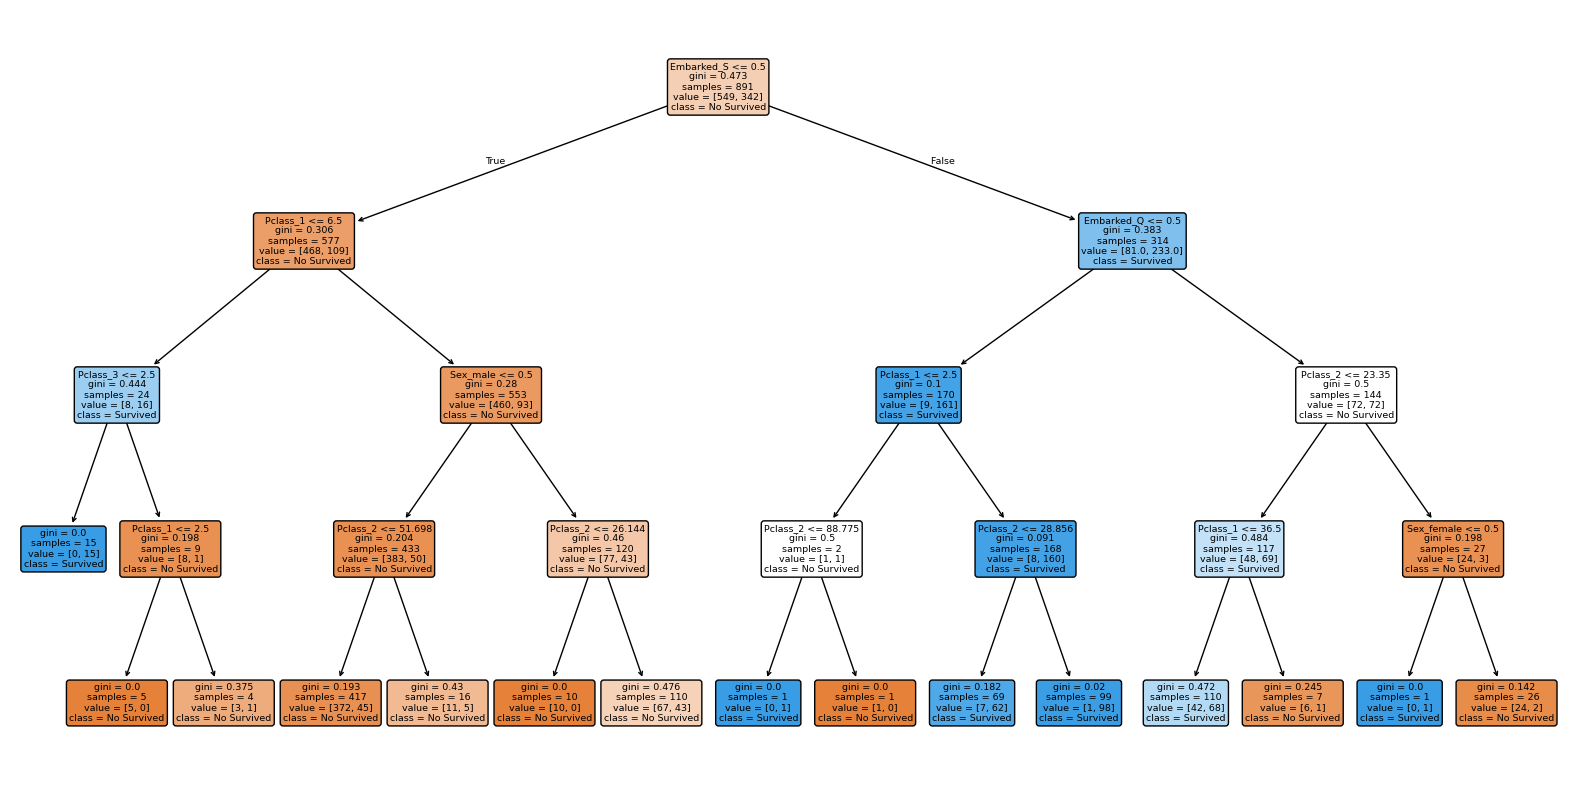

In [32]:
tree = model.named_steps["tree"]

plt.figure(figsize=(20, 10))  # tamaño de la imagen
plot_tree(
    tree,
    filled=True,                # colores según las clases
    rounded=True,               # bordes redondeados
    feature_names=model.named_steps["preprocess"]
                    .transformers_[1][1]
                    .named_steps["onehot"]
                    .get_feature_names_out(categorical_features)
                    .tolist()
                    + numeric_features,
    class_names=["No Survived", "Survived"]
)
plt.show()